In [1]:
from scipy.io import loadmat
import numpy as np
import numpy.linalg as la

import matplotlib.pyplot as plt
#import matplotlib.cm as cm
%matplotlib notebook

In [2]:
X = loadmat('ex7data1.mat')['X']

<IPython.core.display.Javascript object>


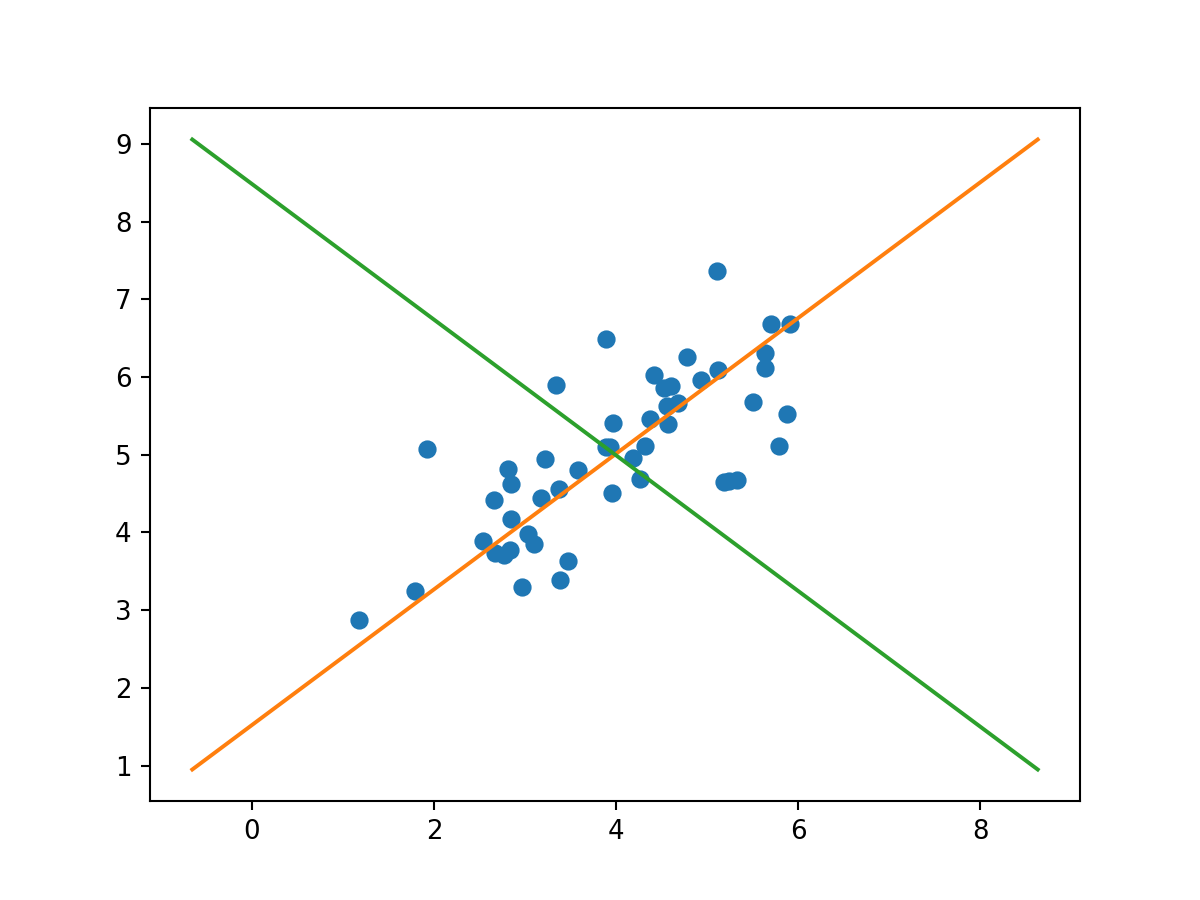

In [4]:
plt.figure()
plt.plot(X[:,0], X[:,1], 'o')

In [17]:
def normalize(ip):
    mu = np.mean(ip,axis=0)
    sigma = np.std(ip,axis=0)
    return (ip-mu)/sigma , mu ,sigma

def PCA(X):
    m = X.shape[0]
    U, S, V = np.linalg.svd((X.T @ X) / m)
    return U, S

def projectData(X, U, K):
    return (X @ U[:,:K])

def recoverData(Z, U, K):
    return (Z @ U[:,:K].T)

def displayk2(X,k=10):
    '''function to display numbers data works different than course
    k is number of images in row'''
    m,n = X.shape
    side = int(np.sqrt(n))
    X = X.reshape(k,k*side,side).transpose(0,2,1).reshape(k*side,k*side)
    plt.figure()
    plt.imshow(X , cmap = 'Greys')

In [6]:
X_norm, mu, sigma = normalize(X)
U, S = PCA(X_norm)

In [7]:
# plotting 2 principal eigen vectors direction
xplot = np.linspace(-4,4)
plt.plot(xplot * sigma[0] + mu[0], xplot * (U[0, 0] / U[0, 1]) * sigma[1] + mu[1])
plt.plot(xplot * sigma[0] + mu[0], xplot * (U[1, 0] / U[1, 1]) * sigma[1] + mu[1])

In [9]:
# performing PCA and mapping back projected data to higher dimension
K = 1
Z = projectData(X_norm, U, K)
X_rec = recoverData(Z, U, K)

<IPython.core.display.Javascript object>


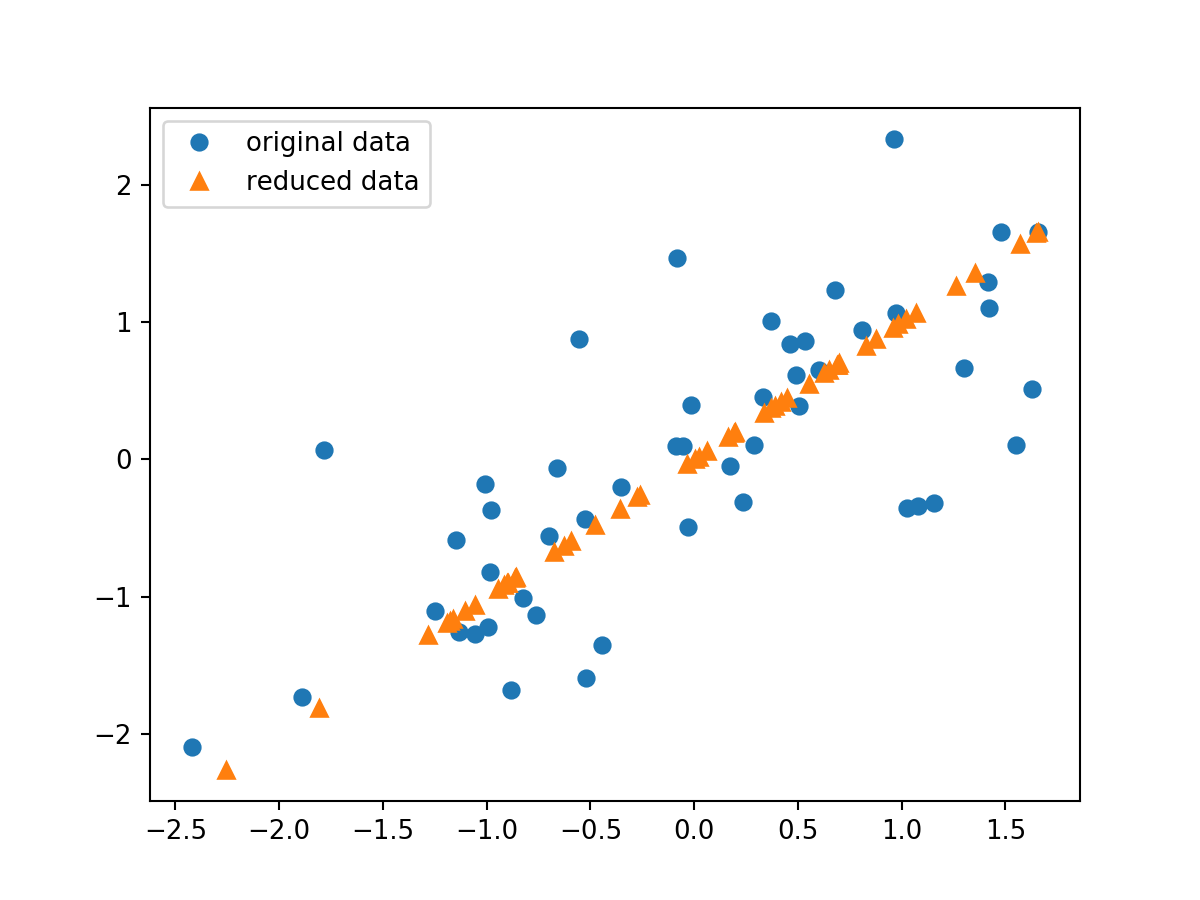

In [11]:
# plotting above data
plt.figure()
plt.plot(X_norm[:, 0], X_norm[:, 1], 'o', label = 'original data')
plt.plot(X_rec[:, 0], X_rec[:, 1], '^', label = 'reduced data')
plt.legend()

In [16]:
# loading faces dataset
facesX = loadmat('ex7faces.mat')['X']

<IPython.core.display.Javascript object>


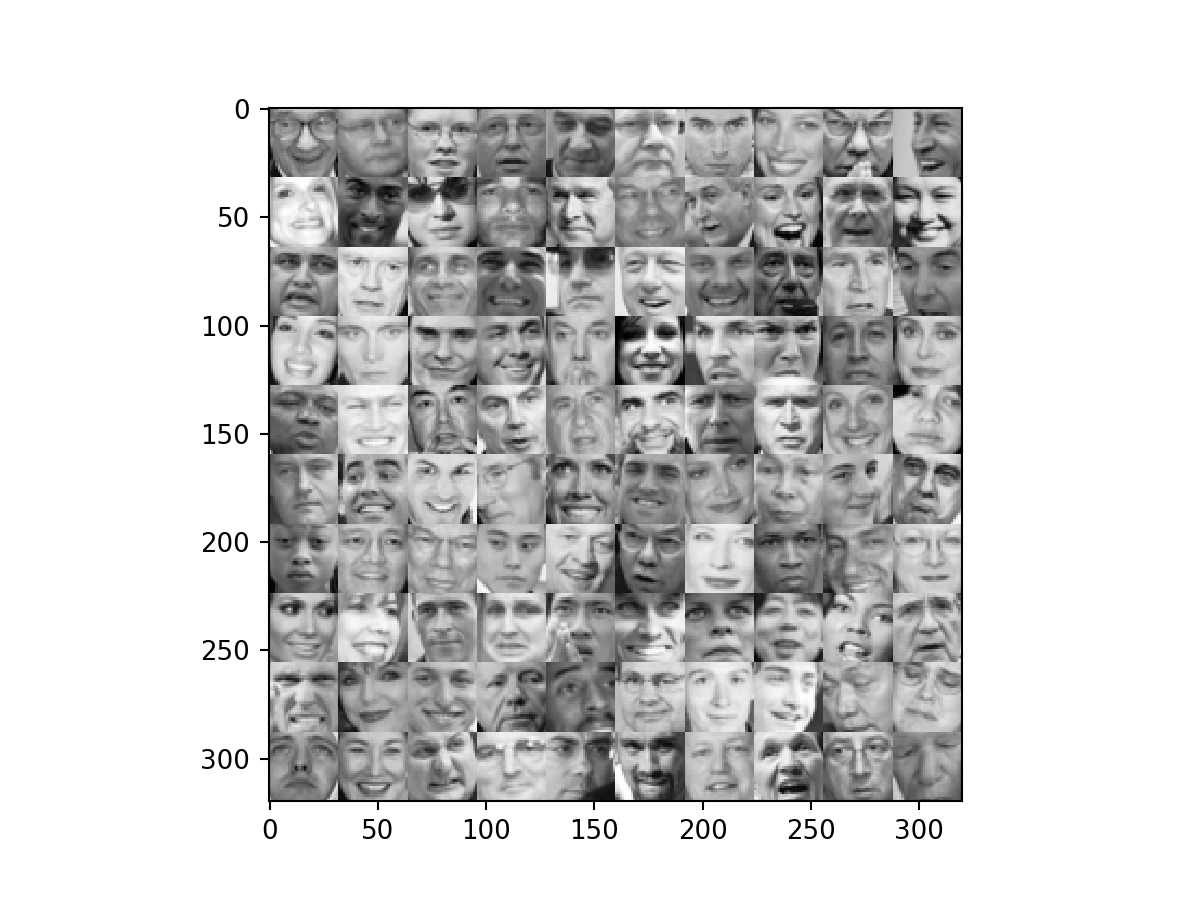

In [27]:
# displaying faces data, -1 is multiplied for negating image values
displayk2(facesX[:100]*-1)

In [28]:
faces_X_norm, mu_f, sigma_f = normalize(facesX)
U_f, S_f = PCA(faces_X_norm)

<IPython.core.display.Javascript object>


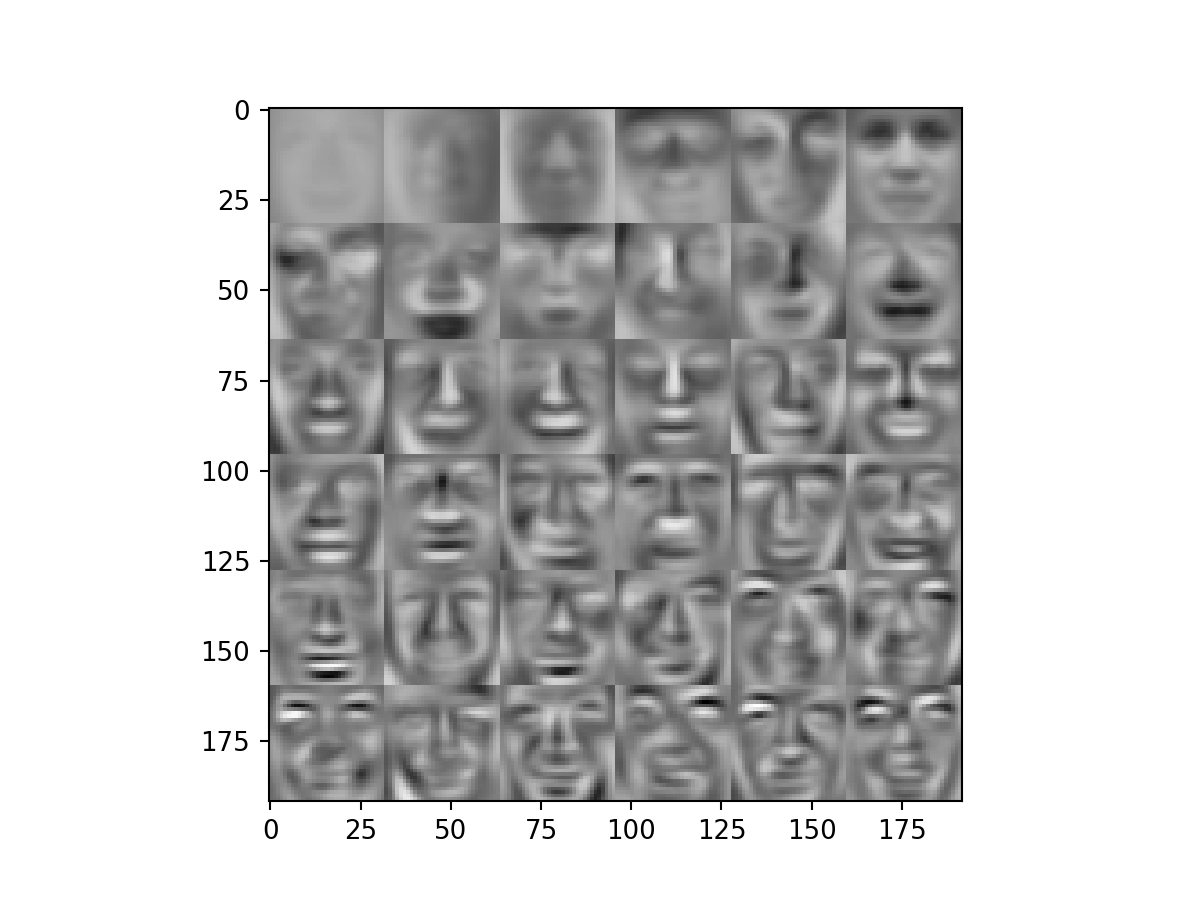

In [63]:
# plotting top 36 eigen vectors (k = sqrt(36))
displayk2(U_f[:,:36].T, 6)

In [53]:
# projecting faces down to 100 dimensions
faces_reduced = projectData(faces_X_norm, U_f, 100)

<IPython.core.display.Javascript object>


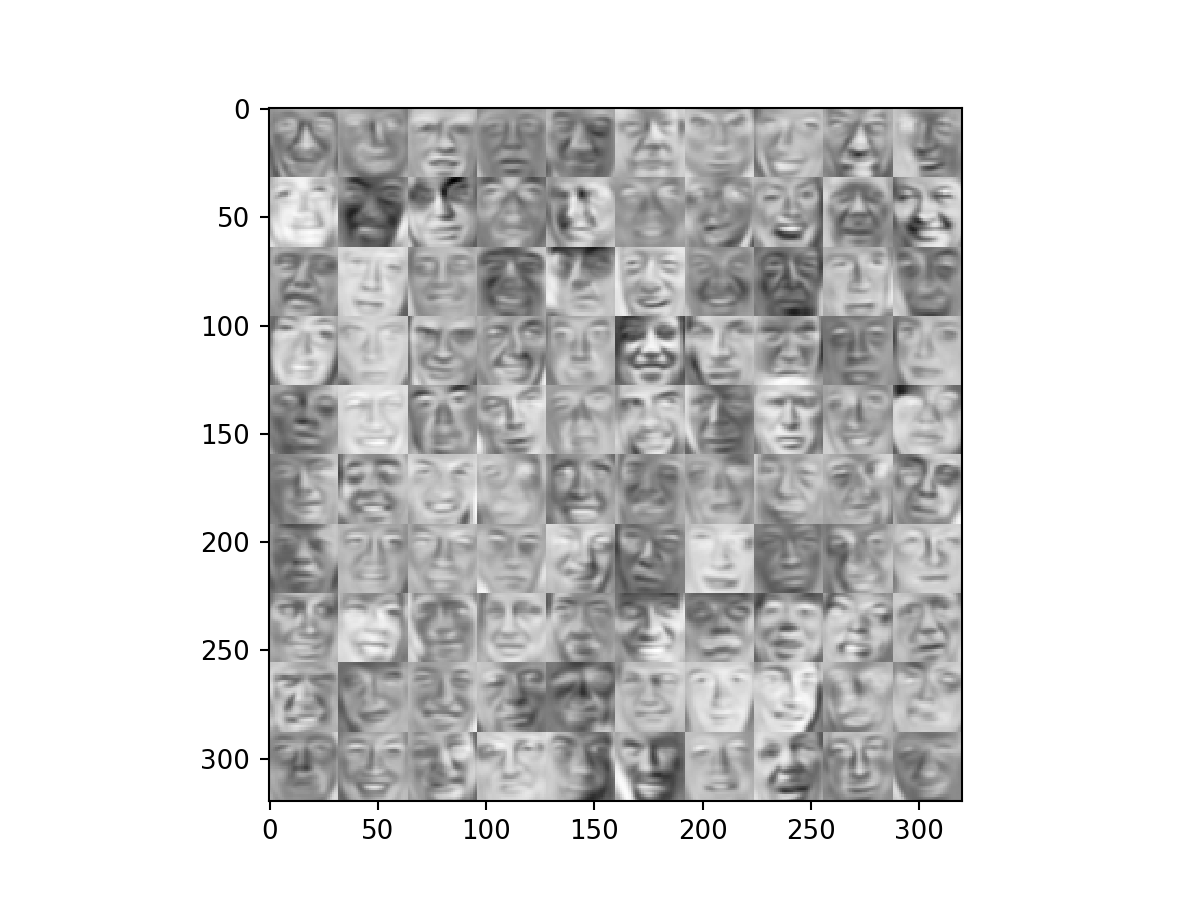

<IPython.core.display.Javascript object>


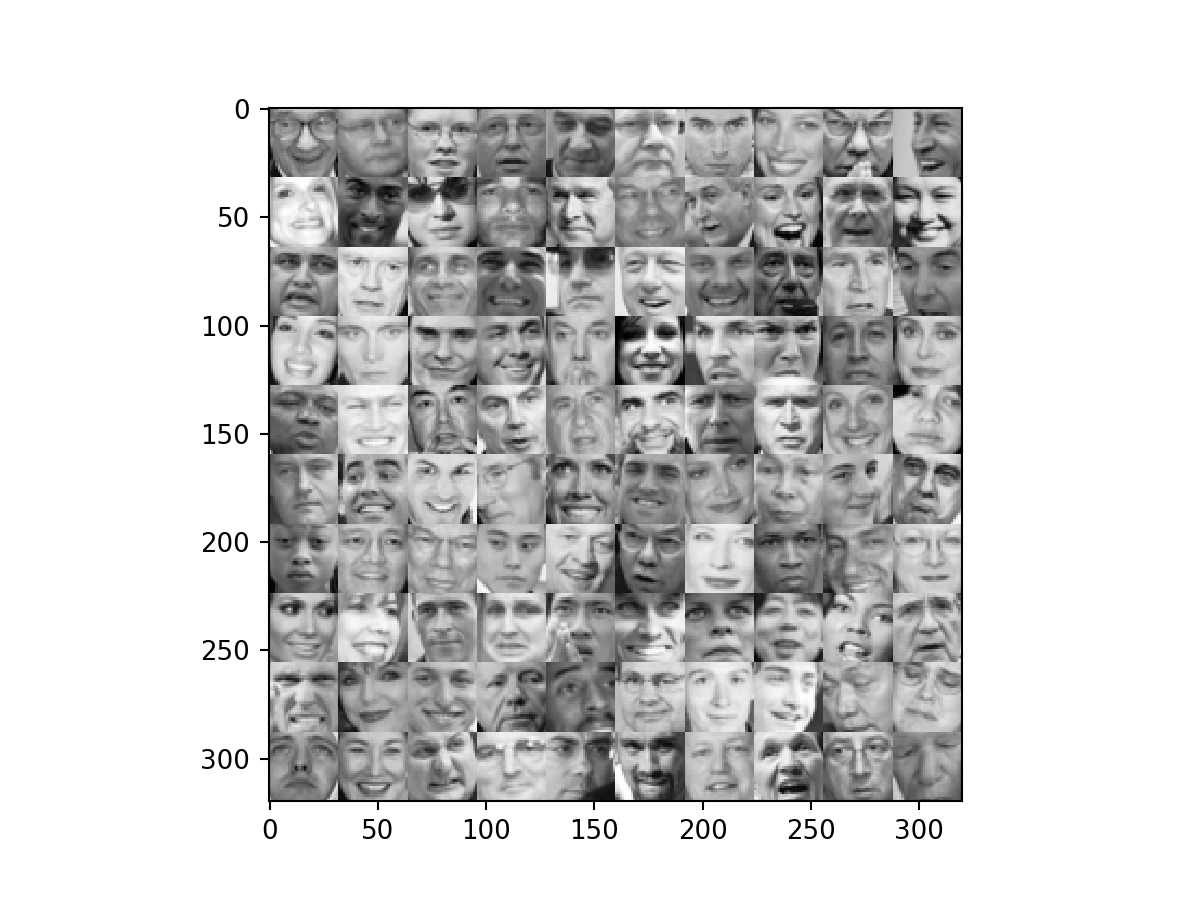

In [66]:
# plotting reduced data
faces_recovered = recoverData(faces_reduced, U_f, 100)
### reduced
displayk2(faces_recovered[:100] * -1)
### original
displayk2(facesX[:100] * -1)